In [65]:
import os
import sys
sys.path.append('utils')
from dataset.spot import DailyDataset_nn, get_loader, TOTAL_STD, TOTAL_MEAN, SPOT
from tqdm import trange, tqdm
import numpy as np
import pandas as pd
import torch
from sklearn.ensemble import GradientBoostingRegressor
from utils.tool import *
import matplotlib.pyplot as plt
import math

import types

%matplotlib inline

In [80]:
np.random.seed(1)


def f(x):
    """The function to predict."""
    return 5 * np.sin(x) + x/10

#----------------------------------------------------------------------
#  First the noiseless case
X = np.atleast_2d(np.random.uniform(0, 100.0, size=1000)).T
X = X.astype(np.float32)

# Observations
y = f(X).ravel()

dy = .5 + 1.0 * np.random.random(y.shape)
noise = np.random.normal(0, dy)
y += noise
y = y.astype(np.float32)

# Mesh the input space for evaluations of the real function, the prediction and
# its MSE
xx = np.atleast_2d(np.linspace(0, 100, 10000)).T
xx = xx.astype(np.float32)



In [83]:
xx

array([[0.0000000e+00],
       [1.0001000e-02],
       [2.0002000e-02],
       ...,
       [9.9979996e+01],
       [9.9989998e+01],
       [1.0000000e+02]], dtype=float32)

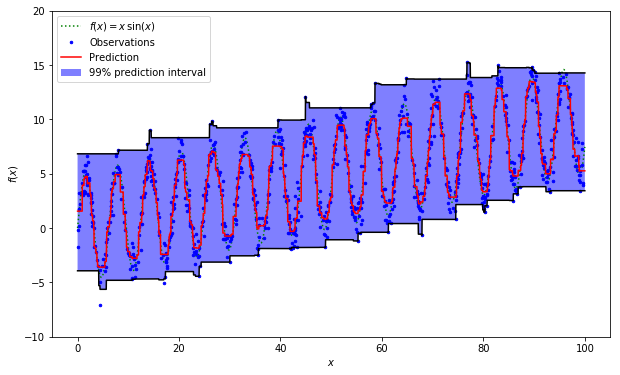

In [82]:
alpha = 0.99

clf = GradientBoostingRegressor(loss='quantile', alpha=alpha,
                                n_estimators=250, max_depth=3,
                                learning_rate=.1, min_samples_leaf=9,
                                min_samples_split=9)

clf.fit(X, y)

# Make the prediction on the meshed x-axis
y_upper = clf.predict(xx)

clf.set_params(alpha=1.0 - alpha)
clf.fit(X, y)

# Make the prediction on the meshed x-axis
y_lower = clf.predict(xx)

clf.set_params(loss='ls')
clf.fit(X, y)

# Make the prediction on the meshed x-axis
y_pred = clf.predict(xx)

# Plot the function, the prediction and the 90% confidence interval based on
# the MSE
fig = plt.figure(figsize=(10,6))
plt.plot(xx, f(xx), 'g:', label=u'$f(x) = x\,\sin(x)$')
plt.plot(X, y, 'b.', markersize=5, label=u'Observations')
plt.plot(xx, y_pred, 'r-', label=u'Prediction')
plt.plot(xx, y_upper, 'k-')
plt.plot(xx, y_lower, 'k-')
plt.fill(np.concatenate([xx, xx[::-1]]),
         np.concatenate([y_upper, y_lower[::-1]]),
         alpha=.5, fc='b', ec='None', label='99% prediction interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(-10, 20)
plt.legend(loc='upper left')
plt.show()

In [ ]:
# prediction intervals

In [60]:
x = SPOT['2012':'2016-06-30'].values
y = SPOT['2015-12-31':'2016-06-29'].values

In [61]:
dataset = DailyDataset_nn(N=2000, W=14)

Data build range: [window(2010-06-27 00:00:00) - 2010-07-11 00:00:00, 2015-12-31 00:00:00]


In [91]:
trainX, trainY = dataset.get_io(start_date='2012-01-01', end_date='2015-12-31')
testX, testY = dataset.get_io(start_date='2016-01-01', end_date='2016-06-30')
trainX = trainX.numpy()[13:]
trainY = trainY.numpy()[:,0]
testX = testX.numpy()[13:]
testY = testY.numpy()[:,0]

In [92]:
alpha = 0.99

clf = GradientBoostingRegressor(loss='quantile', alpha=alpha,
                                n_estimators=250, max_depth=3,
                                learning_rate=.1, min_samples_leaf=9,
                                min_samples_split=9)

clf.fit(trainX, trainY)

# Make the prediction on the meshed x-axis
y_upper = clf.predict(testX)

clf.set_params(alpha=1.0 - alpha)
clf.fit(trainX, trainY)

# Make the prediction on the meshed x-axis
y_lower = clf.predict(testX)

clf.set_params(loss='ls')
clf.fit(trainX, trainY)

GradientBoostingRegressor(alpha=0.010000000000000009,
             criterion='friedman_mse', init=None, learning_rate=0.1,
             loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=9,
             min_samples_split=9, min_weight_fraction_leaf=0.0,
             n_estimators=250, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)